# Predicting Water Potability using Machine Learning

This notebook is using different Python based Machine Learning and Data Science libraries in attempt to build a machine learning model which could predict whether the water is potable or not.

We're going to take the following approach 

1. Problem Definition
2. Data
3. Evaluation
4. Features
5. Modeling
6. Experimentation

## 1. Problem Defination

Access to safe drinking-water is essential to health, a basic human right and a component of effective policy for health protection. This is important as a health and development issue at a national, regional and local level. In some regions, it has been shown that investments in water supply and sanitation can yield a net economic benefit, since the reductions in adverse health effects and health care costs outweigh the costs of undertaking the interventions.

So by using some parameter we will predict that if the water is potable or not.

## 2. Data

We have taken the data from Kaggle. https://www.kaggle.com/datasets/adityakadiwal/water-potability

## 3. Evaluation 

> If we can reach 70% accuracy at predicting whether or not water is potable or not.

## 4. Features

This is where we get different information about each of the features in data.

**Create Data Dictionary**

1. pH value:
PH is an important parameter in evaluating the acid–base balance of water. It is also the indicator of acidic or alkaline condition of water status. WHO has recommended maximum permissible limit of pH from 6.5 to 8.5. The current investigation ranges were 6.52–6.83 which are in the range of WHO standards.

2. Hardness:
Hardness is mainly caused by calcium and magnesium salts. These salts are dissolved from geologic deposits through which water travels. The length of time water is in contact with hardness producing material helps determine how much hardness there is in raw water. Hardness was originally defined as the capacity of water to precipitate soap caused by Calcium and Magnesium.

3. Solids (Total dissolved solids - TDS):
Water has the ability to dissolve a wide range of inorganic and some organic minerals or salts such as potassium, calcium, sodium, bicarbonates, chlorides, magnesium, sulfates etc. These minerals produced un-wanted taste and diluted color in appearance of water. This is the important parameter for the use of water. The water with high TDS value indicates that water is highly mineralized. Desirable limit for TDS is 500 mg/l and maximum limit is 1000 mg/l which prescribed for drinking purpose.

4. Chloramines:
Chlorine and chloramine are the major disinfectants used in public water systems. Chloramines are most commonly formed when ammonia is added to chlorine to treat drinking water. Chlorine levels up to 4 milligrams per liter (mg/L or 4 parts per million (ppm)) are considered safe in drinking water.

5. Sulfate:
Sulfates are naturally occurring substances that are found in minerals, soil, and rocks. They are present in ambient air, groundwater, plants, and food. The principal commercial use of sulfate is in the chemical industry. Sulfate concentration in seawater is about 2,700 milligrams per liter (mg/L). It ranges from 3 to 30 mg/L in most freshwater supplies, although much higher concentrations (1000 mg/L) are found in some geographic locations.

6. Conductivity:
Pure water is not a good conductor of electric current rather’s a good insulator. Increase in ions concentration enhances the electrical conductivity of water. Generally, the amount of dissolved solids in water determines the electrical conductivity. Electrical conductivity (EC) actually measures the ionic process of a solution that enables it to transmit current. According to WHO standards, EC value should not exceeded 400 μS/cm.

7. Organic_carbon:
Total Organic Carbon (TOC) in source waters comes from decaying natural organic matter (NOM) as well as synthetic sources. TOC is a measure of the total amount of carbon in organic compounds in pure water. According to US EPA < 2 mg/L as TOC in treated / drinking water, and < 4 mg/Lit in source water which is use for treatment.

8. Trihalomethanes:
THMs are chemicals which may be found in water treated with chlorine. The concentration of THMs in drinking water varies according to the level of organic material in the water, the amount of chlorine required to treat the water, and the temperature of the water that is being treated. THM levels up to 80 ppm is considered safe in drinking water.

9. Turbidity:
The turbidity of water depends on the quantity of solid matter present in the suspended state. It is a measure of light emitting properties of water and the test is used to indicate the quality of waste discharge with respect to colloidal matter. The mean turbidity value obtained for Wondo Genet Campus (0.98 NTU) is lower than the WHO recommended value of 5.00 NTU.

10. Potability:
Indicates if water is safe for human consumption where 1 means Potable and 0 means Not potable.

## Preparing Tools for our Machine Learning Model

In this project, we're going to use Pandas, Numpy and Matplotlib for Data Manipulation

In [3]:
# Importing tools
# Regular EDA (exploratory data analysis) and plotting libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

#We want our plots to appear inside the notebook
%matplotlib inline

# Models from Scikit-Learn
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier

# Model Evaluations
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.model_selection import RandomizedSearchCV, GridSearchCV
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.metrics import precision_score, recall_score,f1_score
from sklearn.metrics import plot_roc_curve

In [4]:
# Load Data
df=pd.read_csv("water_potability.csv")

In [5]:
df

,ph,Hardness,Solids,Chloramines,Sulfate,Conductivity,Organic_carbon,Trihalomethanes,Turbidity,Potability
0,NaN,204.890455,20791.318981,7.300212,368.516441,564.308654,10.379783,86.990970,2.963135,0
1,3.716080,129.422921,18630.057858,6.635246,NaN,592.885359,15.180013,56.329076,4.500656,0
2,8.099124,224.236259,19909.541732,9.275884,NaN,418.606213,16.868637,66.420093,3.055934,0
3,8.316766,214.373394,22018.417441,8.059332,356.886136,363.266516,18.436524,100.341674,4.628771,0
4,9.092223,181.101509,17978.986339,6.546600,310.135738,398.410813,11.558279,31.997993,4.075075,0
...,...,...,...,...,...,...,...,...,...,...
3271,4.668102,193.681735,47580.991603,7.166639,359.948574,526.424171,13.894419,66.687695,4.435821,1
3272,7.808856,193.553212,17329.802160,8.061362,NaN,392.449580,19.903225,NaN,2.798243,1
3273,9.419510,175.762646,33155.578218,7.350233,NaN,432.044783,11.039070,69.845400,3.298875,1
3274,5.126763,230.603758,11983.869376,6.303357,NaN,402.883113,11.168946,77.488213,4.708658,1


In [6]:
df.toPnumpy()

AttributeError: 'DataFrame' object has no attribute 'tonumpy'

In [4]:
df['Potability'].value_counts()

0    1998
1    1278
Name: Potability, dtype: int64

In [5]:
# Dropping Rows With Null Values
df.dropna(inplace=True)

In [10]:
# Reseting the index after dropping null values
df.reset_index(inplace = True, drop = True)
#df.drop('level_0',axis=1,inplace=True)
df

,ph,Hardness,Solids,Chloramines,Sulfate,Conductivity,Organic_carbon,Trihalomethanes,Turbidity,Potability
0,8.316766,214.373394,22018.417441,8.059332,356.886136,363.266516,18.436524,100.341674,4.628771,0
1,9.092223,181.101509,17978.986339,6.546600,310.135738,398.410813,11.558279,31.997993,4.075075,0
2,5.584087,188.313324,28748.687739,7.544869,326.678363,280.467916,8.399735,54.917862,2.559708,0
3,10.223862,248.071735,28749.716544,7.513408,393.663396,283.651634,13.789695,84.603556,2.672989,0
4,8.635849,203.361523,13672.091764,4.563009,303.309771,474.607645,12.363817,62.798309,4.401425,0
...,...,...,...,...,...,...,...,...,...,...
2006,8.989900,215.047358,15921.412018,6.297312,312.931022,390.410231,9.899115,55.069304,4.613843,1
2007,6.702547,207.321086,17246.920347,7.708117,304.510230,329.266002,16.217303,28.878601,3.442983,1
2008,11.491011,94.812545,37188.826022,9.263166,258.930600,439.893618,16.172755,41.558501,4.369264,1
2009,6.069616,186.659040,26138.780191,7.747547,345.700257,415.886955,12.067620,60.419921,3.669712,1


In [11]:
df.to_csv("water-potability11.csv")

In [12]:
# First 5 rows of DataFrame
df.head()

,ph,Hardness,Solids,Chloramines,Sulfate,Conductivity,Organic_carbon,Trihalomethanes,Turbidity,Potability
0,8.316766,214.373394,22018.417441,8.059332,356.886136,363.266516,18.436524,100.341674,4.628771,0
1,9.092223,181.101509,17978.986339,6.546600,310.135738,398.410813,11.558279,31.997993,4.075075,0
2,5.584087,188.313324,28748.687739,7.544869,326.678363,280.467916,8.399735,54.917862,2.559708,0
3,10.223862,248.071735,28749.716544,7.513408,393.663396,283.651634,13.789695,84.603556,2.672989,0
4,8.635849,203.361523,13672.091764,4.563009,303.309771,474.607645,12.363817,62.798309,4.401425,0


In [9]:
# Last 5 rows of DataFrame
df.tail()

,ph,Hardness,Solids,Chloramines,Sulfate,Conductivity,Organic_carbon,Trihalomethanes,Turbidity,Potability
2006,8.989900,215.047358,15921.412018,6.297312,312.931022,390.410231,9.899115,55.069304,4.613843,1
2007,6.702547,207.321086,17246.920347,7.708117,304.510230,329.266002,16.217303,28.878601,3.442983,1
2008,11.491011,94.812545,37188.826022,9.263166,258.930600,439.893618,16.172755,41.558501,4.369264,1
2009,6.069616,186.659040,26138.780191,7.747547,345.700257,415.886955,12.067620,60.419921,3.669712,1
2010,4.668102,193.681735,47580.991603,7.166639,359.948574,526.424171,13.894419,66.687695,4.435821,1


In [10]:
df['Potability'].value_counts()

0    1200
1     811
Name: Potability, dtype: int64

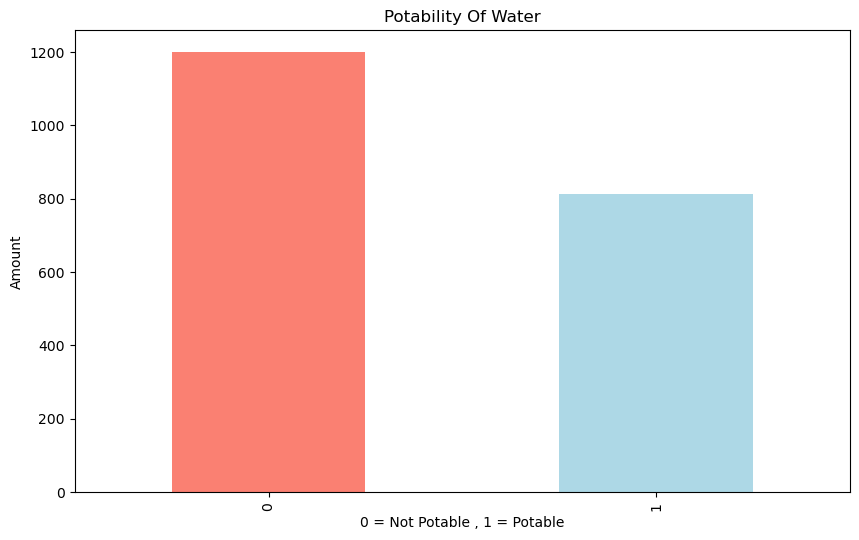

In [14]:
df['Potability'].value_counts().plot(kind='bar',color=['salmon','lightblue'],figsize=(10,6));
plt.title('Potability Of Water')
plt.xlabel("0 = Not Potable , 1 = Potable")
plt.ylabel("Amount");

In [12]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2011 entries, 0 to 2010
Data columns (total 10 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   ph               2011 non-null   float64
 1   Hardness         2011 non-null   float64
 2   Solids           2011 non-null   float64
 3   Chloramines      2011 non-null   float64
 4   Sulfate          2011 non-null   float64
 5   Conductivity     2011 non-null   float64
 6   Organic_carbon   2011 non-null   float64
 7   Trihalomethanes  2011 non-null   float64
 8   Turbidity        2011 non-null   float64
 9   Potability       2011 non-null   int64  
dtypes: float64(9), int64(1)
memory usage: 157.2 KB


In [13]:
df.describe()

,ph,Hardness,Solids,Chloramines,Sulfate,Conductivity,Organic_carbon,Trihalomethanes,Turbidity,Potability
count,2011.000000,2011.000000,2011.000000,2011.000000,2011.000000,2011.000000,2011.000000,2011.000000,2011.000000,2011.000000
mean,7.085990,195.968072,21917.441374,7.134338,333.224672,426.526409,14.357709,66.400859,3.969729,0.403282
std,1.573337,32.635085,8642.239815,1.584820,41.205172,80.712572,3.324959,16.077109,0.780346,0.490678
min,0.227499,73.492234,320.942611,1.390871,129.000000,201.619737,2.200000,8.577013,1.450000,0.000000
25%,6.089723,176.744938,15615.665390,6.138895,307.632511,366.680307,12.124105,55.952664,3.442915,0.000000
50%,7.027297,197.191839,20933.512750,7.143907,332.232177,423.455906,14.322019,66.542198,3.968177,0.000000
75%,8.052969,216.441070,27182.587067,8.109726,359.330555,482.373169,16.683049,77.291925,4.514175,1.000000
max,14.000000,317.338124,56488.672413,13.127000,481.030642,753.342620,27.006707,124.000000,6.494749,1.000000


### Water Potability According to ph

In [14]:
pd.DataFrame(zip(df.ph,df.Hardness,df.Potability),columns=['ph','Hardness','Potability'])

,ph,Hardness,Potability
0,8.316766,214.373394,0
1,9.092223,181.101509,0
2,5.584087,188.313324,0
3,10.223862,248.071735,0
4,8.635849,203.361523,0
...,...,...,...
2006,8.989900,215.047358,1
2007,6.702547,207.321086,1
2008,11.491011,94.812545,1
2009,6.069616,186.659040,1


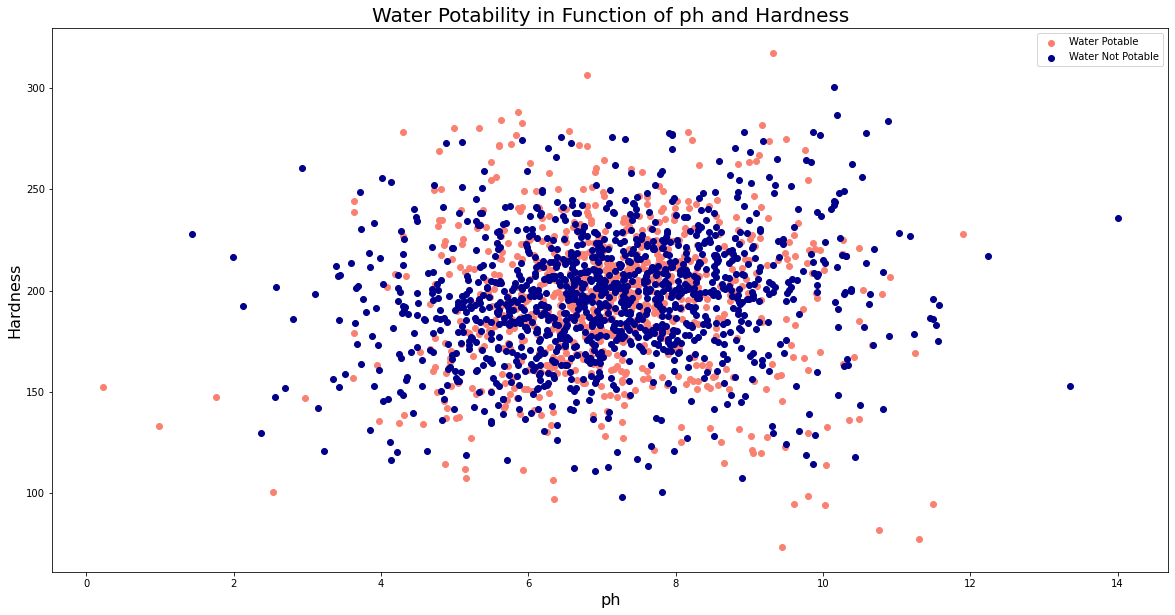

In [15]:
# Create another figure 
plt.figure(figsize=(20,10))

# Scatter with positive examples
plt.scatter(df.ph[df.Potability==1],
            df.Hardness[df.Potability==1],
            c='salmon')

# Scatter with Negative Results
plt.scatter(df.ph[df.Potability==0],
            df.Hardness[df.Potability==0],
            c='darkblue')

plt.title('Water Potability in Function of ph and Hardness',fontsize=20)
plt.xlabel('ph',fontsize=16)
plt.ylabel('Hardness',fontsize=16)
plt.legend(['Water Potable','Water Not Potable']);

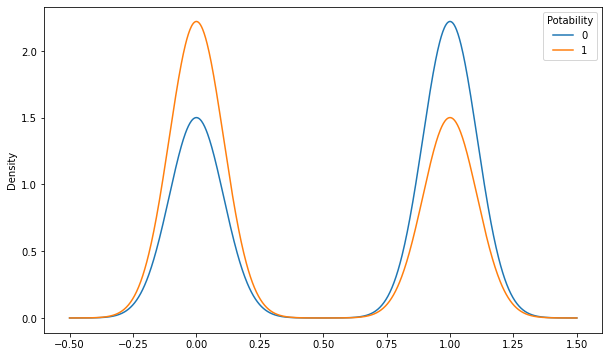

In [16]:
pd.crosstab(df.Sulfate,df.Potability).plot(kind='density',figsize=(10,6));

In [17]:
# Correlation Matrix
df.corr()

,ph,Hardness,Solids,Chloramines,Sulfate,Conductivity,Organic_carbon,Trihalomethanes,Turbidity,Potability
ph,1.000000,0.108948,-0.087615,-0.024768,0.010524,0.014128,0.028375,0.018278,-0.035849,0.014530
Hardness,0.108948,1.000000,-0.053269,-0.022685,-0.108521,0.011731,0.013224,-0.015400,-0.034831,-0.001505
Solids,-0.087615,-0.053269,1.000000,-0.051789,-0.162769,-0.005198,-0.005484,-0.015668,0.019409,0.040674
Chloramines,-0.024768,-0.022685,-0.051789,1.000000,0.006254,-0.028277,-0.023808,0.014990,0.013137,0.020784
Sulfate,0.010524,-0.108521,-0.162769,0.006254,1.000000,-0.016192,0.026776,-0.023347,-0.009934,-0.015303
Conductivity,0.014128,0.011731,-0.005198,-0.028277,-0.016192,1.000000,0.015647,0.004888,0.012495,-0.015496
Organic_carbon,0.028375,0.013224,-0.005484,-0.023808,0.026776,0.015647,1.000000,-0.005667,-0.015428,-0.015567
Trihalomethanes,0.018278,-0.015400,-0.015668,0.014990,-0.023347,0.004888,-0.005667,1.000000,-0.020497,0.009244
Turbidity,-0.035849,-0.034831,0.019409,0.013137,-0.009934,0.012495,-0.015428,-0.020497,1.000000,0.022682
Potability,0.014530,-0.001505,0.040674,0.020784,-0.015303,-0.015496,-0.015567,0.009244,0.022682,1.000000


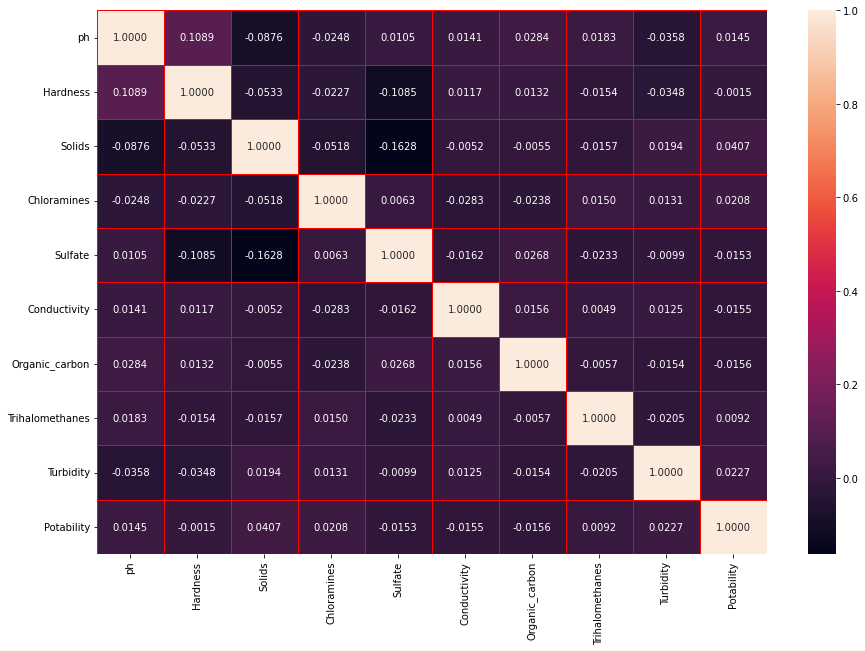

In [18]:
# Let's make our correlation matrix a little prettier
corr_matrix=df.corr()
fig,ax=plt.subplots(figsize=(15,10))
ax=sns.heatmap(df.corr(), annot = True, linewidths = 0.5, linecolor = "red", fmt = ".4f", ax = ax )
ax;

## 5. Modelling

In [84]:
df.head()

,ph,Hardness,Solids,Chloramines,Sulfate,Conductivity,Organic_carbon,Trihalomethanes,Turbidity,Potability
0,8.316766,214.373394,22018.417441,8.059332,356.886136,363.266516,18.436524,100.341674,4.628771,0
1,9.092223,181.101509,17978.986339,6.546600,310.135738,398.410813,11.558279,31.997993,4.075075,0
2,5.584087,188.313324,28748.687739,7.544869,326.678363,280.467916,8.399735,54.917862,2.559708,0
3,10.223862,248.071735,28749.716544,7.513408,393.663396,283.651634,13.789695,84.603556,2.672989,0
4,8.635849,203.361523,13672.091764,4.563009,303.309771,474.607645,12.363817,62.798309,4.401425,0


In [19]:
# Splitting the data into X and y
X=df.drop('Potability',axis=1)
y=df['Potability']

In [16]:
X

,ph,Hardness,Solids,Chloramines,Sulfate,Conductivity,Organic_carbon,Trihalomethanes,Turbidity
0,8.316766,214.373394,22018.417441,8.059332,356.886136,363.266516,18.436524,100.341674,4.628771
1,9.092223,181.101509,17978.986339,6.546600,310.135738,398.410813,11.558279,31.997993,4.075075
2,5.584087,188.313324,28748.687739,7.544869,326.678363,280.467916,8.399735,54.917862,2.559708
3,10.223862,248.071735,28749.716544,7.513408,393.663396,283.651634,13.789695,84.603556,2.672989
4,8.635849,203.361523,13672.091764,4.563009,303.309771,474.607645,12.363817,62.798309,4.401425
...,...,...,...,...,...,...,...,...,...
2006,8.989900,215.047358,15921.412018,6.297312,312.931022,390.410231,9.899115,55.069304,4.613843
2007,6.702547,207.321086,17246.920347,7.708117,304.510230,329.266002,16.217303,28.878601,3.442983
2008,11.491011,94.812545,37188.826022,9.263166,258.930600,439.893618,16.172755,41.558501,4.369264
2009,6.069616,186.659040,26138.780191,7.747547,345.700257,415.886955,12.067620,60.419921,3.669712


In [17]:
y

0       0
1       0
2       0
3       0
4       0
       ..
2006    1
2007    1
2008    1
2009    1
2010    1
Name: Potability, Length: 2011, dtype: int64

In [20]:
# Splitting the data into training set and test set
np.random.seed(42)
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2)

In [21]:
X_train

,ph,Hardness,Solids,Chloramines,Sulfate,Conductivity,Organic_carbon,Trihalomethanes,Turbidity
261,9.927024,208.490738,19666.992792,8.008618,340.237824,482.842435,11.360427,85.829113,4.051733
607,8.769676,215.368742,13969.438863,7.548543,322.799070,369.016667,18.919188,54.755214,3.776718
1965,8.077261,125.302719,23931.282833,8.773162,317.693331,398.328789,15.279583,62.668356,4.279871
240,9.739562,166.948864,13623.160063,7.235922,385.059134,369.591289,12.322604,68.505852,2.568080
819,5.343075,211.662091,45166.912141,6.651801,279.767500,485.959717,19.682337,70.546862,4.240032
...,...,...,...,...,...,...,...,...,...
1130,7.965337,151.541889,25274.610305,7.106043,352.316182,527.688242,15.792625,52.268490,3.390982
1294,6.519848,183.225998,14284.647917,8.389078,373.091575,495.417954,11.638475,58.661649,3.272286
860,7.615557,204.869974,8403.284552,6.012316,418.309431,311.178955,12.742329,67.282328,4.243134
1459,7.899452,210.734124,15896.365937,6.907203,319.886957,448.666423,18.169921,124.000000,2.853767


In [92]:
X_test

,ph,Hardness,Solids,Chloramines,Sulfate,Conductivity,Organic_carbon,Trihalomethanes,Turbidity
1317,8.157518,236.344440,27931.208402,6.203676,325.323955,511.587664,13.381575,80.686958,4.469431
526,8.296344,198.197051,17468.999802,8.262904,369.590740,294.325142,18.026098,44.061625,5.400811
393,6.576845,156.221768,12772.095750,9.759898,341.749378,418.972467,10.382253,78.305180,3.771314
1405,7.606067,248.041453,14609.976883,6.356555,322.356572,275.317146,11.706095,94.775244,4.581477
433,5.393346,172.550261,28099.038729,5.789669,372.621943,505.542349,17.530704,67.273874,4.633855
...,...,...,...,...,...,...,...,...,...
733,3.637171,238.943744,10102.489720,7.532192,337.534425,509.150323,13.818450,49.652834,5.446566
1474,4.881730,136.990466,19105.014903,7.264678,419.716412,358.046318,13.399392,75.934052,3.050198
692,8.775486,157.354289,22113.391452,7.931503,304.807845,480.715208,15.692839,82.929345,4.393944
1767,7.710138,174.350577,31017.239418,8.212234,269.859799,437.514066,9.320040,51.545335,3.898671


In [94]:
y_train

261     0
607     0
1965    1
240     1
819     0
       ..
1130    0
1294    0
860     0
1459    1
1126    0
Name: Potability, Length: 1608, dtype: int64

In [19]:
y_test

1317    0
526     0
393     0
1405    0
433     1
       ..
733     1
1474    1
692     1
1767    0
1624    0
Name: Potability, Length: 403, dtype: int64

Now we've got our data split into training and test sets, its time to build a machine learning model.

We'll train it (find the patterns) on the training set.

And We'll test it (use the patterns) on the test set.

We're going to try 3 different machine learning models:
1. Logistic Regression
2. K-Nearest Neighbors Classifier
3. Random Forest Classifier

Logistic Regression 

The logistic regression statistic modeling technique is used when we have a binary outcome variable. For example: given the parameters, will the student pass or fail? Will it rain or not? etc. So, though we may have continuous or categorical independent variables, we can use the logistic regression modeling technique to predict the outcome when the outcome variable is binary.

K-Nearest Neighbors Classifier

The k-nearest neighbors algorithm, also known as KNN or k-NN, is a non-parametric, supervised learning classifier, which uses proximity to make classifications or predictions about the grouping of an individual data point.

Random Forest Classifier

A random forest is a meta estimator that fits a number of decision tree classifiers on various sub-samples of the dataset and uses averaging to improve the predictive accuracy and control over-fitting.

In [22]:
# Put models in a dictionary
models={"Logistic Regression": LogisticRegression(),
        "KNN": KNeighborsClassifier(),
        "Random Forest Classifier": RandomForestClassifier()}
# Create a function to fit and score models
def fit_and_score(models, X_train, X_test, y_train, y_test):
    """
    Fits and evaluate given machine learning models.
    models : a dict of differnt Scikit-Learn machine learning models
    X_train : training data (no labels)
    X_test : testing data(no labels)
    y_train : training labels
    y_test : test labels
    """
    # Set random seed
    np.random.seed(42)
    # Make a dictionary to keep model scores
    model_scores={}
    #Loop through models
    for name,model in models.items():
        # Fit the model to the data
        model.fit(X_train,y_train)
        # Evaluate the model and append its score to model_scores
        model_scores[name] = model.score(X_test,y_test)
    return model_scores  

In [23]:
model_scores = fit_and_score(models=models,X_train=X_train,X_test=X_test,y_train=y_train,y_test=y_test)
model_scores

{'Logistic Regression': 0.5732009925558312,
 'KNN': 0.5409429280397022,
 'Random Forest Classifier': 0.652605459057072}

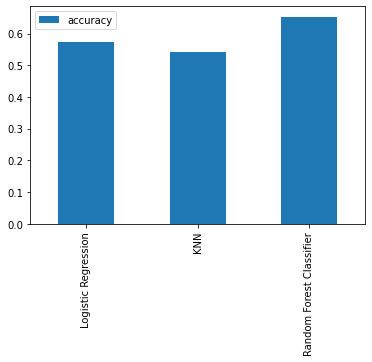

In [24]:
model_compare=pd.DataFrame(model_scores,index=["accuracy"])
model_compare.T.plot.bar();

Now we've got a baseline model... and we know a model's first predictions aren't always what we should based ournext steps off. What should we do?

Let's look at the following:
* Hyperparameter tuning
* Feature importance
* Confusion Matrix
* Cross-Validation
* Precision
* Recall
* F1 Score
* Classification Report
* ROC Curve
* Area under the curve (AUC)

## Hyperparameter Tuning

In [25]:
# Let's tune KNN

train_scores=[]
test_scores=[]

# Create a list of different values for n_neighbors
neighbors=range(1,21)

# Setup KNN instance
knn = KNeighborsClassifier()

# Loop through different n_neighbors
for i in neighbors:
    knn.set_params(n_neighbors=i)
    
    # Fit the algorithms
    knn.fit(X_train,y_train)
    
    # Update the training scores list
    train_scores.append(knn.score(X_train,y_train))
    
    # Update the test scores list
    test_scores.append(knn.score(X_test,y_test))

In [12]:
train_scores

[1.0,
 0.7549751243781094,
 0.7481343283582089,
 0.6902985074626866,
 0.695273631840796,
 0.6927860696517413,
 0.6847014925373134,
 0.6759950248756219,
 0.6741293532338308,
 0.6623134328358209,
 0.6654228855721394,
 0.6511194029850746,
 0.652363184079602,
 0.6393034825870647,
 0.6467661691542289,
 0.6411691542288557,
 0.6374378109452736,
 0.6324626865671642,
 0.6330845771144279,
 0.6380597014925373]

In [13]:
test_scores

[0.5583126550868487,
 0.5856079404466501,
 0.5235732009925558,
 0.56575682382134,
 0.5409429280397022,
 0.5508684863523573,
 0.5459057071960298,
 0.5781637717121588,
 0.575682382133995,
 0.56575682382134,
 0.5508684863523573,
 0.5632754342431762,
 0.5384615384615384,
 0.5508684863523573,
 0.5459057071960298,
 0.5607940446650124,
 0.543424317617866,
 0.5558312655086849,
 0.5359801488833746,
 0.5558312655086849]

Maximum KNN score on the test data: 58.56%


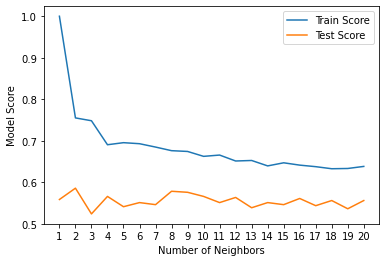

In [26]:
plt.plot(neighbors, train_scores, label="Train Score")
plt.plot(neighbors, test_scores, label="Test Score")
plt.xticks(np.arange(1,21,1))
plt.xlabel("Number of Neighbors")
plt.ylabel("Model Score")
plt.legend()

print(f"Maximum KNN score on the test data: {max(test_scores)*100:.2f}%")

## Hyperparameters tuning with RandomizedSearchCV

We're going to tune:
* LogisticRegression
* RandomForestClassifier()

... using RandomizedSearchCmV

In [27]:
# Create a hyperparameter grid for LogisticRegression
log_reg_grid={"C":np.logspace(-5,5,25),
              "solver": ['liblinear','sag']}

# Create a hyperparameter grid for RandomForestClassifier
rf_grid = {"n_estimators": np.arange(10,1000,30),
           "max_depth": [None,3,5,7,10],
           "min_samples_split": np.arange(1,20,2),
           "min_samples_leaf": np.arange(1,20,2)}

Now we've got hyperparameter grids setup for each of our models,let's tune them using RandomizedSearchCV`

In [28]:
# Tune LogisiticRegression
np.random.seed(42)

# Setup random hyperparameter search for LogisticRegression
rs_log_reg= RandomizedSearchCV(LogisticRegression(),
                               param_distributions=log_reg_grid,
                               cv=5,
                               n_iter=20,
                               verbose=True)

# Fit random hyperparameter search model for LogisticRegression
rs_log_reg.fit(X_train,y_train)

Fitting 5 folds for each of 20 candidates, totalling 100 fits


C:\Users\hp\Desktop\Water-Potability\env\lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
C:\Users\hp\Desktop\Water-Potability\env\lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
C:\Users\hp\Desktop\Water-Potability\env\lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
C:\Users\hp\Desktop\Water-Potability\env\lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
C:\Users\hp\Desktop\Water-Potability\env\lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
C:\Users\hp\Desktop\Water-Pota

C:\Users\hp\Desktop\Water-Potability\env\lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
C:\Users\hp\Desktop\Water-Potability\env\lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
C:\Users\hp\Desktop\Water-Potability\env\lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
C:\Users\hp\Desktop\Water-Potability\env\lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
C:\Users\hp\Desktop\Water-Potability\env\lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
C:\Users\hp\Desktop\Water-Pota

RandomizedSearchCV(cv=5, estimator=LogisticRegression(), n_iter=20,
                   param_distributions={'C': array([1.00000000e-05, 2.61015722e-05, 6.81292069e-05, 1.77827941e-04,
       4.64158883e-04, 1.21152766e-03, 3.16227766e-03, 8.25404185e-03,
       2.15443469e-02, 5.62341325e-02, 1.46779927e-01, 3.83118685e-01,
       1.00000000e+00, 2.61015722e+00, 6.81292069e+00, 1.77827941e+01,
       4.64158883e+01, 1.21152766e+02, 3.16227766e+02, 8.25404185e+02,
       2.15443469e+03, 5.62341325e+03, 1.46779927e+04, 3.83118685e+04,
       1.00000000e+05]),
                                        'solver': ['liblinear', 'sag']},
                   verbose=True)

In [29]:
rs_log_reg.best_params_

{'solver': 'liblinear', 'C': 2.6101572156825386}

In [30]:
rs_log_reg.score(X_test,y_test)

0.5732009925558312

Now we've tuned LogisticRegression(),let's do the same for RandomForestClassifier()

In [31]:
# Setup Random Seed
np.random.seed(42)

# Setup random hyperparameter search for RandomizedSearchCV
rs_rf= RandomizedSearchCV(RandomForestClassifier(),
                          param_distributions=rf_grid,
                          n_iter=20,
                          verbose=True,
                          cv=5)

# Fit random hyperparameter search model for RandomForestClassifier
rs_rf.fit(X_train,y_train)

Fitting 5 folds for each of 20 candidates, totalling 100 fits


C:\Users\hp\Desktop\Water-Potability\env\lib\site-packages\sklearn\model_selection\_validation.py:378: FitFailedWarning: 
5 fits failed out of a total of 100.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
5 fits failed with the following error:
Traceback (most recent call last):
  File "C:\Users\hp\Desktop\Water-Potability\env\lib\site-packages\sklearn\model_selection\_validation.py", line 686, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\hp\Desktop\Water-Potability\env\lib\site-packages\sklearn\ensemble\_forest.py", line 476, in fit
    trees = Parallel(
  File "C:\Users\hp\Desktop\Water-Potability\env\lib\site-packages\joblib\parallel.py", line 1043, in __call__
    if self.dispatch_one_batch(i

RandomizedSearchCV(cv=5, estimator=RandomForestClassifier(), n_iter=20,
                   param_distributions={'max_depth': [None, 3, 5, 7, 10],
                                        'min_samples_leaf': array([ 1,  3,  5,  7,  9, 11, 13, 15, 17, 19]),
                                        'min_samples_split': array([ 1,  3,  5,  7,  9, 11, 13, 15, 17, 19]),
                                        'n_estimators': array([ 10,  40,  70, 100, 130, 160, 190, 220, 250, 280, 310, 340, 370,
       400, 430, 460, 490, 520, 550, 580, 610, 640, 670, 700, 730, 760,
       790, 820, 850, 880, 910, 940, 970])},
                   verbose=True)

In [32]:
rs_rf.best_params_

{'n_estimators': 310,
 'min_samples_split': 7,
 'min_samples_leaf': 5,
 'max_depth': None}

In [33]:
rs_rf.score(X_test,y_test)

0.6774193548387096

## HyperTuning with GridSearchCV

Since Our RandomForestClassifier model provides the best score so far so we will try to improve it more using GridSearchCV

In [181]:
# Different Hyperparameters for our RandomForestClassifier model
rf_cl_grid={"n_estimators": np.arange(305,315,2),
           "max_depth": [None,5,7],
           "min_samples_split": np.arange(4,10,2),
           "min_samples_leaf": np.arange(4,10,2)}
# Setup grid hyperparameter search for LogisticRegression
gs_rf_cl= GridSearchCV(RandomForestClassifier(),param_grid=rf_cl_grid,
                        cv=5,
                        verbose=True)

# Fit grid hyperparameter search model
gs_rf_cl.fit(X_train,y_train);

Fitting 5 folds for each of 135 candidates, totalling 675 fits


In [182]:
gs_rf_cl.best_params_

{'max_depth': None,
 'min_samples_leaf': 4,
 'min_samples_split': 8,
 'n_estimators': 313}

In [183]:
gs_rf_cl.score(X_test,y_test)

0.6625310173697271

## Evaluating our Machine Learning Model beyond accuracy

* ROC curve and AUC curve 
* Confusion Matrix
* Classification Report
* Precision
* Recall
* F1-score

... and it would be great if cross-validation was used where possible

In [34]:
# Make predictions with tuned model
y_preds=rs_rf.predict(X_test)

In [35]:
y_preds

array([0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0,
       1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 1, 1, 1,
       0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0,
       0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0,
       1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 1,
       1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0,
       0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0,
       0, 1, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0,
       0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0,
       0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 1,
       0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 1,

In [19]:
y_test

1317    0
526     0
393     0
1405    0
433     1
       ..
733     1
1474    1
692     1
1767    0
1624    0
Name: Potability, Length: 403, dtype: int64

C:\Users\hp\Desktop\Water-Potability\env\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_roc_curve is deprecated; Function :func:`plot_roc_curve` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: :meth:`sklearn.metric.RocCurveDisplay.from_predictions` or :meth:`sklearn.metric.RocCurveDisplay.from_estimator`.
  warnings.warn(msg, category=FutureWarning)


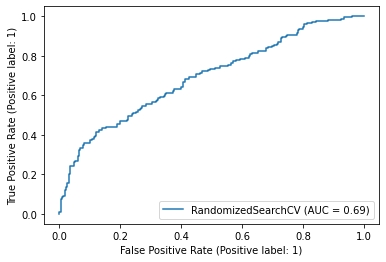

In [37]:
# Plot ROC curve and calculate AUC metric 
plot_roc_curve(rs_rf,X_test,y_test);

In [38]:
# Confusion Matrix
print(confusion_matrix(y_test,y_preds))

[[203  28]
 [102  70]]


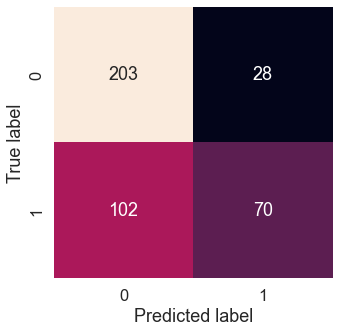

In [42]:
# Import Seaborn
import seaborn as sns
sns.set(font_scale=1.5) # Increase font size
 
def plot_conf_mat(y_test, y_preds):
    """
    Plots a confusion matrix using Seaborn's heatmap().
    """
    fig, ax = plt.subplots(figsize=(5, 5))
    ax = sns.heatmap(confusion_matrix(y_test, y_preds),
                     annot=True, # Annotate the boxes
                     cbar=False,
                     fmt='')
    plt.xlabel("Predicted label") # predictions go on the x-axis
    plt.ylabel("True label") # true labels go on the y-axis 
    
plot_conf_mat(y_test, y_preds)

Now we've got a ROC curve, an AUC metric and a confusion matrix, let's get a classification report as well as cross-validated precision, recall and F1-score

In [44]:
print(classification_report(y_test,y_preds))

              precision    recall  f1-score   support

           0       0.67      0.88      0.76       231
           1       0.71      0.41      0.52       172

    accuracy                           0.68       403
   macro avg       0.69      0.64      0.64       403
weighted avg       0.69      0.68      0.66       403



### Calculate evaluation metrics using cross-validation

We're going to calculate precision, recall and f1-score of our model using cross-validation and to do so we'll be using `cross_val_score()`.

In [45]:
# Check best hyperparamters
rs_rf.best_params_

{'n_estimators': 310,
 'min_samples_split': 7,
 'min_samples_leaf': 5,
 'max_depth': None}

In [27]:
# Create a new classifier with best parameters
clf=RandomForestClassifier(n_estimators=310,
                           min_samples_split=7,
                           min_samples_leaf=5,
                           max_depth=None)

In [56]:
# Cross-validated accuracy
cv_acc= cross_val_score(clf,X,y,cv=5,scoring='accuracy')
cv_acc

array([0.60049628, 0.65671642, 0.66915423, 0.61940299, 0.69154229])

In [57]:
cv_acc=np.mean(cv_acc)
cv_acc

0.6474624396627285

In [58]:
# Cross-validated precision
cv_precision=cross_val_score(clf,X,y,cv=5,scoring='precision')
cv_precision=np.mean(cv_precision)
cv_precision

0.6157141111380586

In [59]:
# Cross-validated Recall
cv_recall=cross_val_score(clf,X,y,cv=5,scoring='recall')
cv_recall=np.mean(cv_recall)
cv_recall

0.35393471180792246

In [60]:
# Cross-validated F1-score
cv_f1=cross_val_score(clf,X,y,cv=5,scoring='f1')
cv_f1=np.mean(cv_f1)
cv_f1

0.4324110823940555

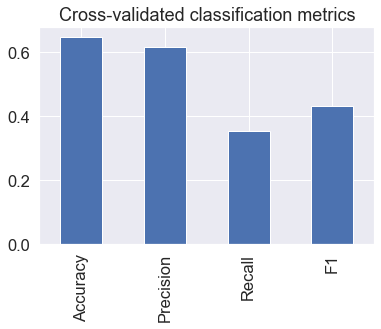

In [61]:
# Visualize cross-validated metrics 
cv_metrics = pd.DataFrame({'Accuracy': cv_acc,
                          'Precision': cv_precision,
                          "Recall": cv_recall,
                          'F1':cv_f1},
                          index=[0])
cv_metrics.T.plot.bar(title='Cross-validated classification metrics',legend=False);

In [25]:
import pickle
pickle.dump(clf,open('water-potability.pkl','wb'))